In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('csv_temperatures.csv')
df

,id,Temperature,Date
0,1,20.7,1981-01-01 00:00:00
1,2,17.9,1981-01-02 00:00:00
2,3,18.8,1981-01-03 00:00:00
3,4,14.6,1981-01-04 00:00:00
4,5,15.8,1981-01-05 00:00:00
...,...,...,...
3280,3281,13.3,1989-12-27 00:00:00
3281,3282,11.7,1989-12-28 00:00:00
3282,3283,10.4,1989-12-29 00:00:00
3283,3284,14.4,1989-12-30 00:00:00


In [4]:
df['time'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %H:%M:%S")
df

,id,Temperature,Date,time
0,1,20.7,1981-01-01 00:00:00,1981-01-01
1,2,17.9,1981-01-02 00:00:00,1981-01-02
2,3,18.8,1981-01-03 00:00:00,1981-01-03
3,4,14.6,1981-01-04 00:00:00,1981-01-04
4,5,15.8,1981-01-05 00:00:00,1981-01-05
...,...,...,...,...
3280,3281,13.3,1989-12-27 00:00:00,1989-12-27
3281,3282,11.7,1989-12-28 00:00:00,1989-12-28
3282,3283,10.4,1989-12-29 00:00:00,1989-12-29
3283,3284,14.4,1989-12-30 00:00:00,1989-12-30


In [5]:
df['y'] = df['Temperature'].shift(-1)

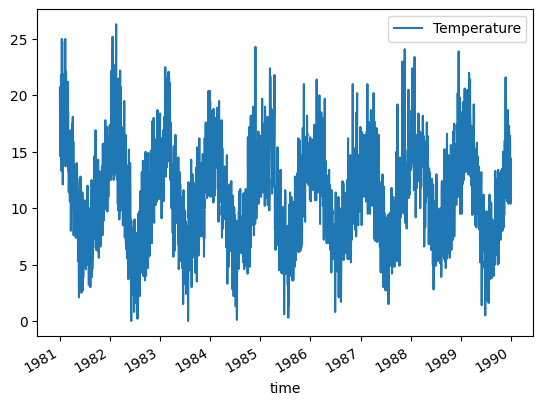

In [6]:
df.plot(kind='line', x='time', y='Temperature')
plt.show()

In [7]:
df.shape[0]

3285

In [8]:
train = df[:2600]
test  = df[2600:]

test = test.drop(test.tail(1).index)

test = test.copy()
test['baseline_pred'] = test['Temperature']
test

,id,Temperature,Date,time,y,baseline_pred
2600,2601,13.2,1988-02-15 00:00:00,1988-02-15,11.8,13.2
2601,2602,11.8,1988-02-16 00:00:00,1988-02-16,13.6,11.8
2602,2603,13.6,1988-02-17 00:00:00,1988-02-17,16.2,13.6
2603,2604,16.2,1988-02-18 00:00:00,1988-02-18,14.1,16.2
2604,2605,14.1,1988-02-19 00:00:00,1988-02-19,13.5,14.1
...,...,...,...,...,...,...
3279,3280,16.0,1989-12-26 00:00:00,1989-12-26,13.3,16.0
3280,3281,13.3,1989-12-27 00:00:00,1989-12-27,11.7,13.3
3281,3282,11.7,1989-12-28 00:00:00,1989-12-28,10.4,11.7
3282,3283,10.4,1989-12-29 00:00:00,1989-12-29,14.4,10.4


In [9]:
%%markdown

# Predict the next time step using the previous observation

<img src="https://miro.medium.com/max/640/1*Nx9RF_NDs73X68qaLfIESQ.jpeg" alt="yt = yt+1" />

## <u>Decision Tree Regressor</u>


# Predict the next time step using the previous observation

<img src="https://miro.medium.com/max/640/1*Nx9RF_NDs73X68qaLfIESQ.jpeg" alt="yt = yt+1" />

## <u>Decision Tree Regressor</u>


In [10]:
from sklearn.tree import DecisionTreeRegressor

X_train = train['Temperature'].values.reshape(-1, 1)
y_train = train['y'].values.reshape(-1, 1)
X_test = test['Temperature'].values.reshape(-1, 1)

In [11]:
# Initiliaze model

dt_reg = DecisionTreeRegressor(random_state=42)

dt_reg.fit(X=X_train, y=y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
dt_pre = dt_reg.predict(X_test)

test['dt_pred'] = dt_pre
test

,id,Temperature,Date,time,y,baseline_pred,dt_pred
2600,2601,13.2,1988-02-15 00:00:00,1988-02-15,11.8,13.2,12.244444
2601,2602,11.8,1988-02-16 00:00:00,1988-02-16,13.6,11.8,11.400000
2602,2603,13.6,1988-02-17 00:00:00,1988-02-17,16.2,13.6,14.019048
2603,2604,16.2,1988-02-18 00:00:00,1988-02-18,14.1,16.2,14.775000
2604,2605,14.1,1988-02-19 00:00:00,1988-02-19,13.5,14.1,12.723077
...,...,...,...,...,...,...,...
3279,3280,16.0,1989-12-26 00:00:00,1989-12-26,13.3,16.0,15.258824
3280,3281,13.3,1989-12-27 00:00:00,1989-12-27,11.7,13.3,13.918182
3281,3282,11.7,1989-12-28 00:00:00,1989-12-28,10.4,11.7,12.183333
3282,3283,10.4,1989-12-29 00:00:00,1989-12-29,14.4,10.4,11.452381


In [13]:
%%markdown

## <u>Gradient boosting</u>


## <u>Gradient boosting</u>


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y=y_train.ravel())

gbr_pred = gbr.predict(X_test)

test['gbr_pred'] = gbr_pred
test

,id,Temperature,Date,time,y,baseline_pred,dt_pred,gbr_pred
2600,2601,13.2,1988-02-15 00:00:00,1988-02-15,11.8,13.2,12.244444,12.536409
2601,2602,11.8,1988-02-16 00:00:00,1988-02-16,13.6,11.8,11.400000,11.780251
2602,2603,13.6,1988-02-17 00:00:00,1988-02-17,16.2,13.6,14.019048,13.574152
2603,2604,16.2,1988-02-18 00:00:00,1988-02-18,14.1,16.2,14.775000,15.185811
2604,2605,14.1,1988-02-19 00:00:00,1988-02-19,13.5,14.1,12.723077,13.291812
...,...,...,...,...,...,...,...,...
3279,3280,16.0,1989-12-26 00:00:00,1989-12-26,13.3,16.0,15.258824,15.185811
3280,3281,13.3,1989-12-27 00:00:00,1989-12-27,11.7,13.3,13.918182,13.248623
3281,3282,11.7,1989-12-28 00:00:00,1989-12-28,10.4,11.7,12.183333,11.780251
3282,3283,10.4,1989-12-29 00:00:00,1989-12-29,14.4,10.4,11.452381,10.704929


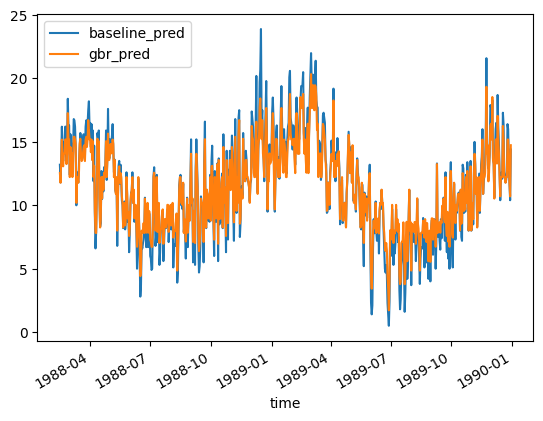

In [15]:
test.plot(kind='line', x='time', y=['baseline_pred', 'gbr_pred'])
plt.show()

In [16]:
%%markdown

# Evaluation

[Mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)


# Evaluation

[Mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)


In [17]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)


In [18]:

baseline_mape = mape(test['Temperature'], test['baseline_pred'])
dt_mape = mape(test['Temperature'], test['dt_pred'])
gbr_mape = mape(test['Temperature'], test['gbr_pred'])

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]

for i in range(len(x)):
    print(x[i], y[i])


Baseline 0.0
Decision Tree 10.3
Gradient Boosting 8.69
